# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [40]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

In [42]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [43]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')


In [66]:
# get all the classes of tables
for row in soup.find_all('table'):
    print(row.get('class'))
# looking for tables that has class table
table_data = soup.find('table',class_='table')
table_data

['table']


<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [67]:
# Create an empty list
# Loop through the scraped data to create a list of rows
header = []
rows = []
for i, row in enumerate(table_data.find_all('tr')):
    if i == 0:
        header = [element.text.strip() for element in row.find_all('th')]
    else:
        rows.append([element.text.strip() for element in row.find_all('td')])

In [75]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(rows)
table_df.columns=header

In [76]:
# Confirm DataFrame was created successfully
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

In [77]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [80]:
# Change data types for data analysis
table_df = table_df.astype({'terrestrial_date':'datetime64[ns]',"sol":"int64","ls":"int64","month":"int64","min_temp":"float64","pressure":"float64"})

In [81]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

In [149]:
# 1. How many months are there on Mars?
table_df['month'].value_counts()


4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: month, dtype: int64

In [132]:
# 2. How many Martian days' worth of data are there?
table_df['sol'].nunique()

1867

In [139]:
# 3. What is the average low temperature by month?
low_temp_mnth = table_df.groupby(['month']).mean()['min_temp']
low_temp_mnth
sorted = low_temp_mnth.sort_values(ascending=True)
sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

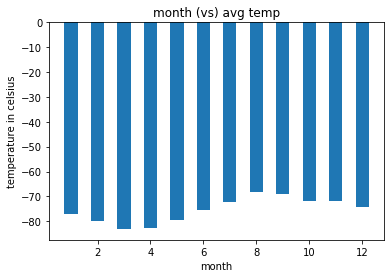

In [117]:
# Plot the average temperature by month
# Identify the coldest and hottest months in Curiosity's location
bar_plot = plt.bar(low_temp_mnth.index,low_temp_mnth.values, width=0.5)
plt.xlabel('month')
plt.ylabel('temperature in celsius')
plt.title("month (vs) avg temp")
plt.show()

In [120]:
# 4. Average pressure by Martian month
avg_pressure = table_df.groupby(["month"]).mean()["pressure"]
avg_pressure


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

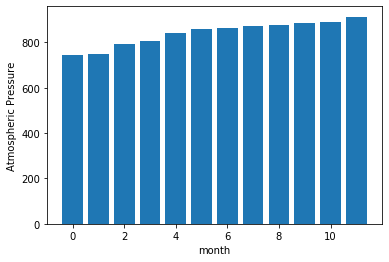

In [126]:
# Plot the average pressure by month
plt.bar(range(len(avg_pressure.index)), sorted(avg_pressure.values))
plt.xlabel("month")
plt.ylabel("Atmospheric Pressure")
plt.show()


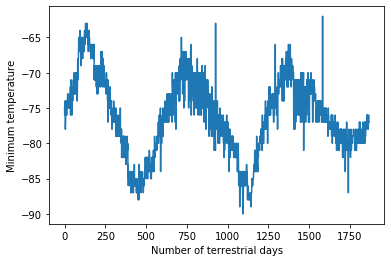

In [145]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(range(len(table_df.terrestrial_date)), table_df.min_temp)
plt.xlabel("Number of terrestrial days")
plt.ylabel("Minimum temperature")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [147]:
# Write the data to a CSV
table_df.to_csv("mars_weather_data.csv", index= False)


In [148]:
browser.quit()